In [90]:
import matplotlib as mpl
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import seaborn as sns
import plotly.express as px 

In [91]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [164]:
act = pd.read_csv('/content/gdrive/MyDrive/2_act_info.csv')
cus = pd.read_csv('/content/gdrive/MyDrive/2_cus_info.csv')
iem = pd.read_csv('/content/gdrive/MyDrive/2_iem_info.csv')
trd_kr = pd.read_csv('/content/gdrive/MyDrive/2_trd_kr.csv')
trd_oss = pd.read_csv('/content/gdrive/MyDrive/2_trd_oss.csv')
#data_schema_vf.xlsx

In [93]:
# Y세대 : 1980~2000년생 (21살~40살) / Z세대 2001년생~ (1살~20살)

In [94]:
trd_oss

,act_id,orr_dt,orr_ord,orr_rtn_hur,lst_cns_hur,iem_cd,sby_dit_cd,cns_qty,orr_pr,orr_mdi_dit_cd,cur_cd,trd_cur_xcg_rt
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
29296,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,1,1,1,US88160R1014,1,2.0,1080.8800,3,USD,1200.70
29297,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,2,1,1,US88160R1014,2,1.0,1080.0000,3,USD,1200.70
29298,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,3,3,3,US88160R1014,2,1.0,1083.0000,3,USD,1200.70
29299,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,4,23,23,US88160R1014,1,2.0,1040.5600,3,USD,1200.70


In [95]:
cus

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-
...,...,...,...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-


In [96]:
x = pd.read_excel('/content/gdrive/MyDrive/data_schema_vf.xlsx')

In [97]:
x

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,NaN,"CUS_INFO.CSV(10,000건)",NaN,NaN,NaN,NaN,NaN
1,NaN,No,컬럼명,컬럼한글명,컬럼설명,예시,비고
2,NaN,1,CUS_ID,고객번호,고객을 구분할 수 있는 Unique값,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,고객을 구분할 수 있는 Unique 값
3,NaN,2,SEX_DIT_CD,성별,1: 남성 / 2: 여성,1,NaN
4,NaN,3,CUS_AGE,연령대,00: 19세 이하,10,연령대를 5세 단위로 군집화
...,...,...,...,...,...,...,...
65,NaN,NaN,NaN,NaN,0: 영업점단말 / 1: 유선단말 / 2: 무선단말 / 3: HTS / 4: 기타,NaN,NaN
66,NaN,11,CUR_CD,거래통화코드,AUD: 오스트레일리아-달러 / CAD: 캐나다-달러 / CNY: 렌민비(위안) E...,AUD,NaN
67,NaN,NaN,NaN,NaN,JPY:일본-엔 / KRW: 대한민국-원 / SGD: 싱가포르-달러,NaN,NaN
68,NaN,NaN,NaN,NaN,USD: 미국-달러 / VND: 동,NaN,NaN


In [98]:
cus['sex_dit_cd']

0       2
1       2
2       1
3       1
4       1
       ..
9995    2
9996    2
9997    2
9998    1
9999    1
Name: sex_dit_cd, Length: 10000, dtype: int64

In [99]:
# 1남성 / 2여성
sex_counts = cus['sex_dit_cd'].value_counts()

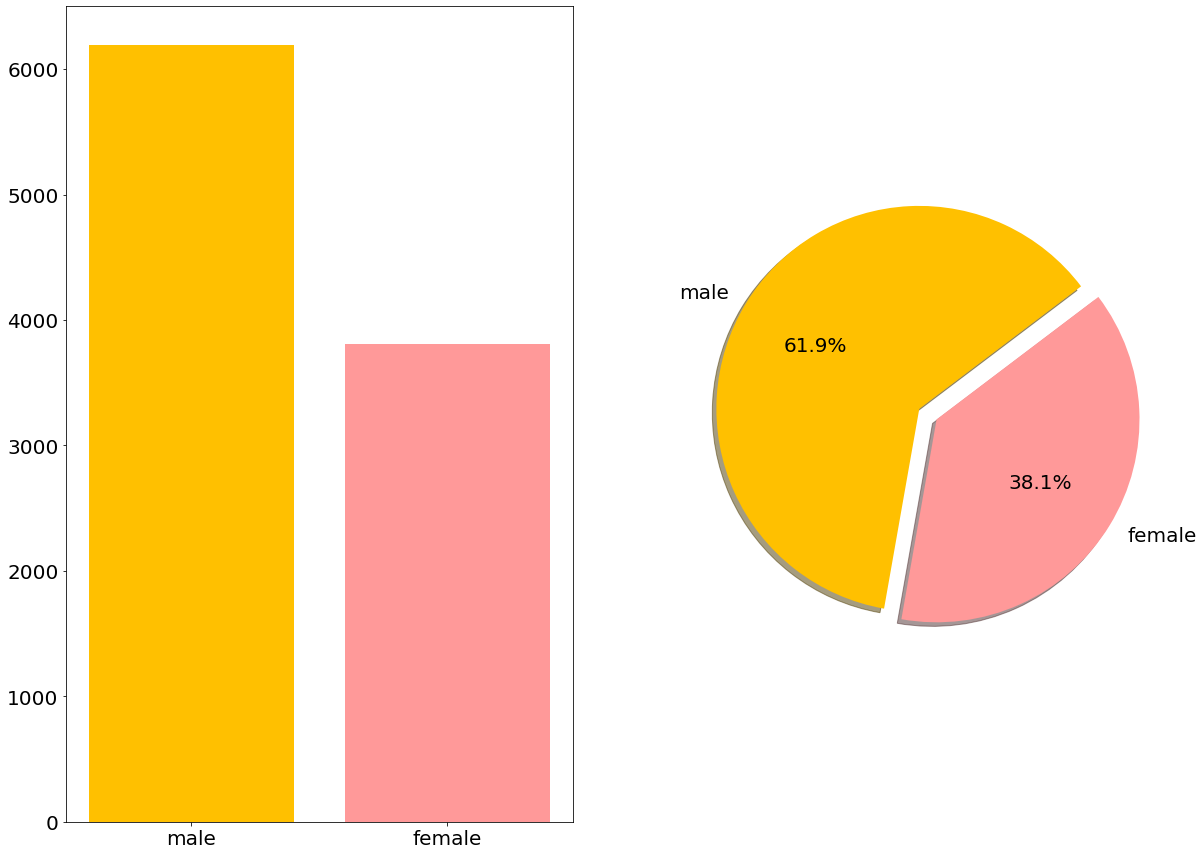

In [100]:
explode = [0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['#ffc000', '#ff9999']


fig, ax = plt.subplots(1,2,figsize=(20,15))


ax[0].bar(['male', 'female'],[sex_counts[1], sex_counts[2]], color = colors)
ax[1].pie([sex_counts[1], sex_counts[2]], labels=['male', 'female'], autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 25}


#plt.scatter(['male', 'female'], [sex_counts[1], sex_counts[2]], marker= 'o', s=400, color= 'red', alpha=0.5)
plt.rcParams.update({'font.size': 20})

plt.show()

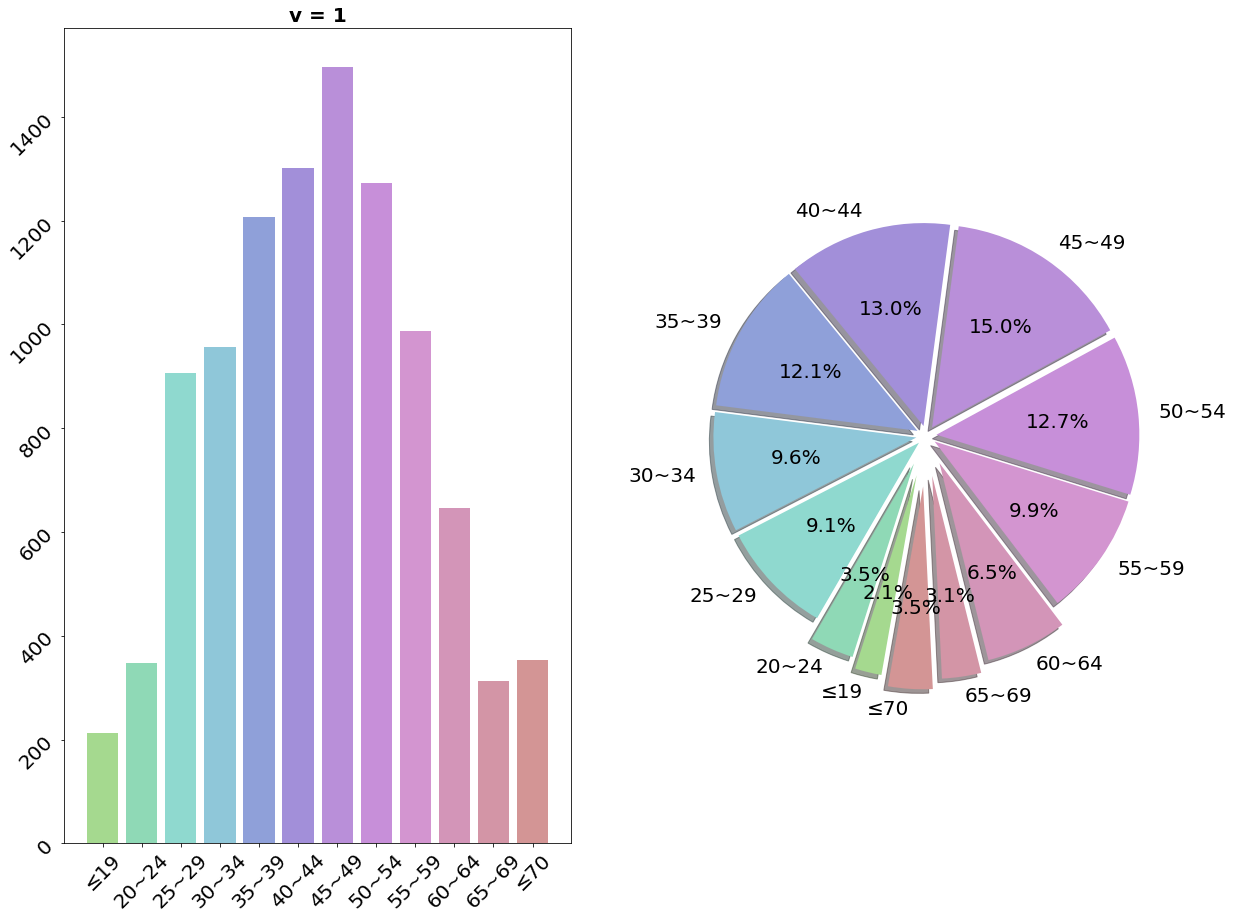

In [101]:
p = cus['cus_age'].value_counts()
p.sort_index(inplace=True)

explode = [0.2, 0.15, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.15, 0.2, 0.25]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
ages = ['≤19', '20~24', '25~29', '30~34', '35~39', '40~44', '45~49', '50~54', '55~59', '60~64', '65~69', '≤70']
colors = ['#a5d98f', '#8fd9b6', '#8fd9cf', '#8fc7d9', '#8fa0d9', '#a28fd9', '#b98fd9', '#c78fd9', '#d395d0', '#d395b8', '#d395a6', '#d39595']


fig, ax = plt.subplots(1, 2,figsize=(20,15))



ax[0].bar(ages,[p[i] for i in [0,20,25,30,35,40,45,50,55,60,65,70]], color = colors)
ax[1].pie([p[i] for i in [0,20,25,30,35,40,45,50,55,60,65,70]], labels = ages, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 10}

plt.rcParams.update({'font.size': 20})

ax[0].tick_params(labelrotation=45)
ax[0].set_title('v = 1',fontweight="bold", size=20)

plt.show()


<h1><span style="background-color:yellow;">--------------------------------12-23 이후------------------------------- </span></h1>

In [102]:
#act
#cus
#iem
#trd_kr
#trd_oss

In [103]:
act.columns = ['계좌번호', '고객번호', '계좌개설월']
cus.columns = ['고객번호', '성별', '연령대', '주소(시도)', '고객등급', '고객투자성향']
iem.columns = ['종목코드', '종목영문명', '종목한글명']
trd_kr.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드']
trd_oss.columns = ['계좌번호','주문날짜','주문순서','주문접수시간대','최종체결시간대','종목코드','매매구분코드','체결수량','체결가격','주문매체구분코드','거래통화코드','거래통화환율']

In [104]:
yz20 = cus['연령대'] == 20
yz25 = cus['연령대'] == 25
yz30 = cus['연령대'] == 30
yz35 = cus['연령대'] == 35

cus_yz = cus.loc[cus['연령대'].index[yz20 | yz25 | yz30 | yz35]]
cus_y = cus.loc[cus['연령대'].index[yz20 | yz25]]
cus_z = cus.loc[cus['연령대'].index[yz30 | yz35]]

In [105]:
import numpy as np

In [106]:
trd_kr

,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드
0,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,1,12,13,A215600,2,35.0,74200.0,3
1,6caf4de40251d37cbba310f0c6dd0ed8f4c7ca4ccfa675...,20190102,2,12,12,A001060,2,20.0,41100.0,3
2,effb34815e1b7efb34beb550f604ede8ac71a5a71edb30...,20190102,1,14,14,A281820,2,20.0,9460.0,4
3,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,1,12,12,A006650,2,1.0,148500.0,3
4,fea6c038cb7236a02d1e779262698a36219b4c9b527ab1...,20190102,2,12,13,A051360,2,10.0,6550.0,3
...,...,...,...,...,...,...,...,...,...,...
3312659,a96172625957ac18f6debba0c3283f1aa4608c1d19a404...,20200630,2,13,13,A900250,1,1.0,1760.0,3
3312660,a96172625957ac18f6debba0c3283f1aa4608c1d19a404...,20200630,3,16,16,A011930,2,2.0,1340.0,3
3312661,c8d469612160df7251dd5d434ca25b0b8e2f40ace9a37f...,20200630,1,11,11,A019175,2,35.0,44000.0,3
3312662,1a046249ad088f30dae8038eb95d51427f10228677d4fb...,20200630,1,16,16,A037950,1,400.0,1810.0,4


In [107]:
trd_oss

,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
29296,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,1,1,1,US88160R1014,1,2.0,1080.8800,3,USD,1200.70
29297,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,2,1,1,US88160R1014,2,1.0,1080.0000,3,USD,1200.70
29298,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,3,3,3,US88160R1014,2,1.0,1083.0000,3,USD,1200.70
29299,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,4,23,23,US88160R1014,1,2.0,1040.5600,3,USD,1200.70


In [108]:
sex_counts_yz = cus_yz['성별'].value_counts()

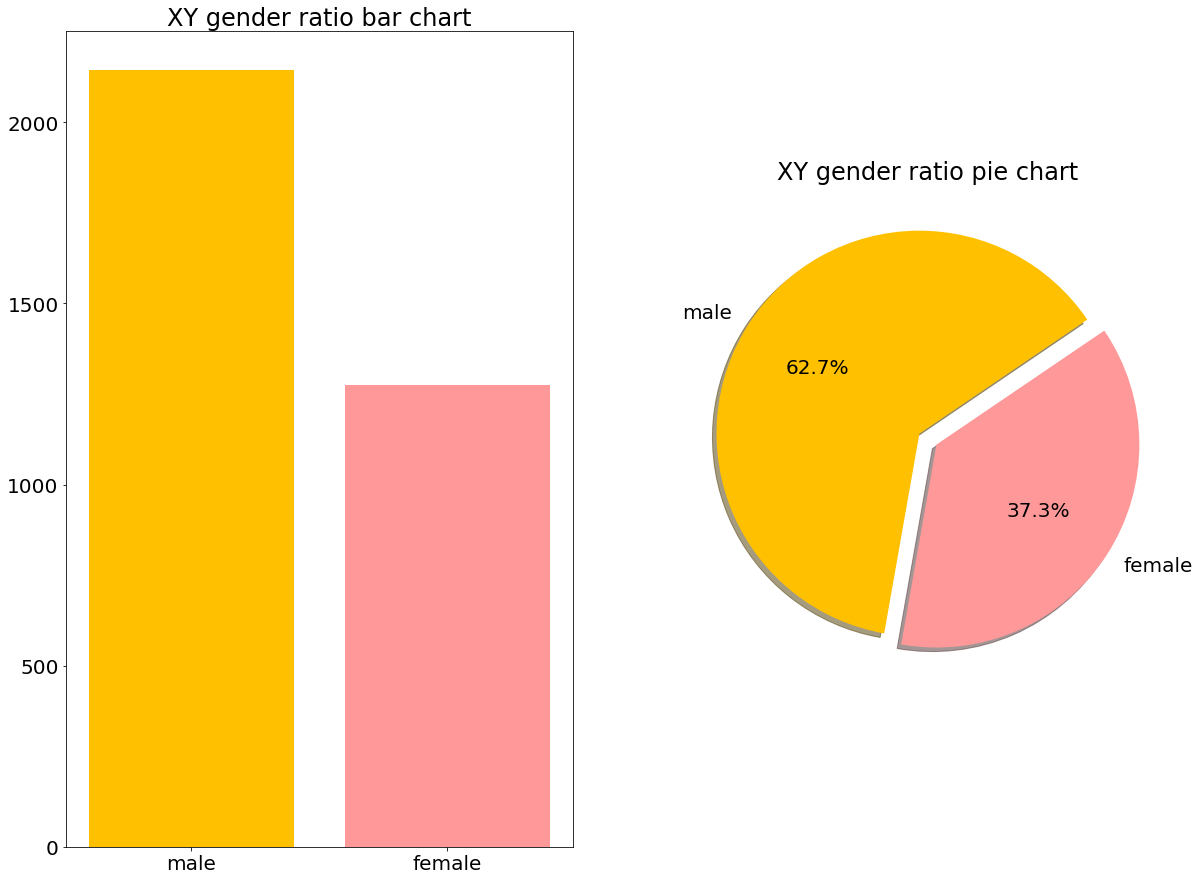

In [109]:
explode = [0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
colors = ['#ffc000', '#ff9999']


fig, ax = plt.subplots(1,2,figsize=(20,15))


ax[0].bar(['male', 'female'],[sex_counts_yz[1], sex_counts_yz[2]], color = colors)
ax[1].pie([sex_counts_yz[1], sex_counts_yz[2]], labels=['male', 'female'], autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 25}

ax[0].set_title('XY gender ratio bar chart')
ax[1].set_title('XY gender ratio pie chart')

#plt.scatter(['male', 'female'], [sex_counts[1], sex_counts[2]], marker= 'o', s=400, color= 'red', alpha=0.5)
plt.rcParams.update({'font.size': 20})

plt.show()

In [110]:
# result = pd.merge(trd_kr, trd_oss, on = '계좌번호')

In [111]:
ages = cus['연령대'].value_counts()
ages.sort_index(inplace=True)

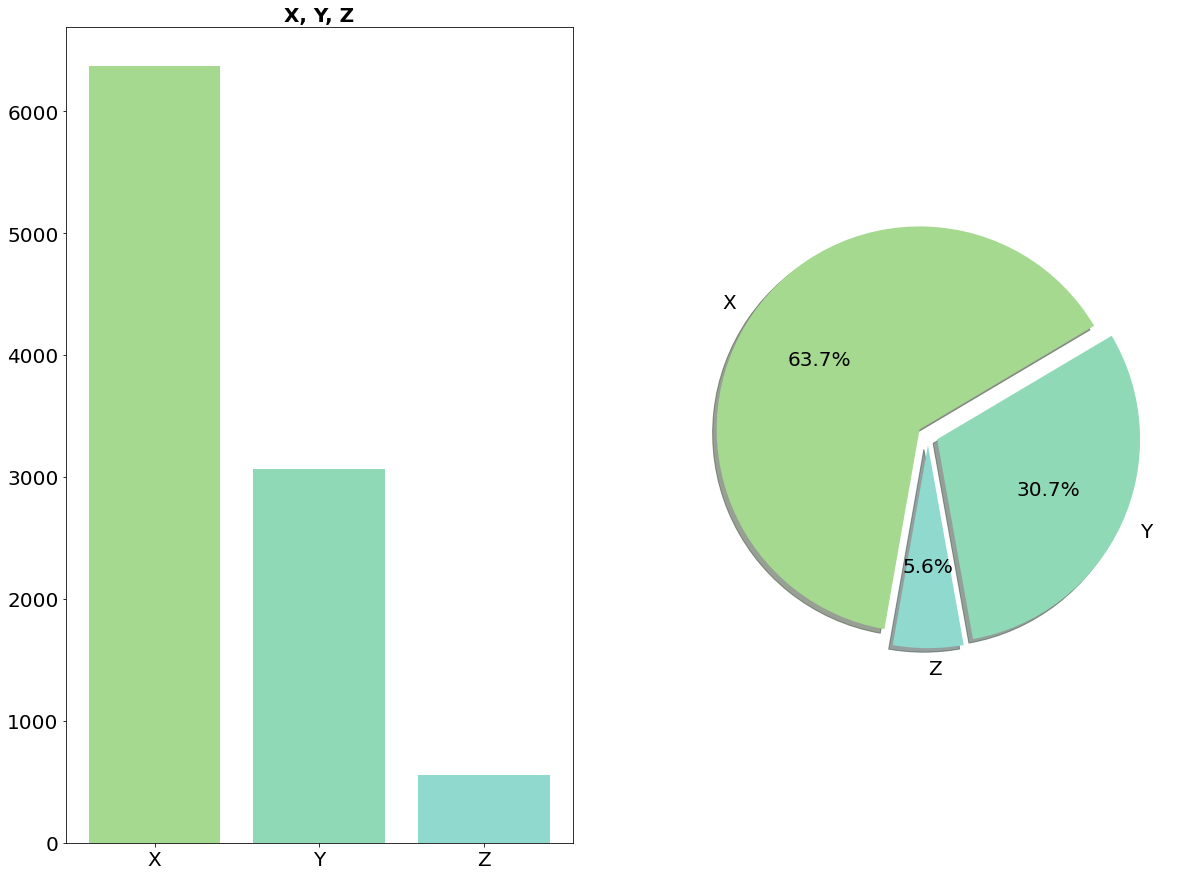

In [112]:
ages = cus['연령대'].value_counts()
ages.sort_index(inplace=True)

X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]
Y = ages[25] + ages[30] + ages[35]
Z = ages[0] + ages[20]

explode = [0.05, 0.05, 0.05]
#colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0']
ages_range = ['X', 'Y', 'Z']
colors = ['#a5d98f', '#8fd9b6', '#8fd9cf', '#8fc7d9', '#8fa0d9', '#a28fd9', '#b98fd9', '#c78fd9', '#d395d0', '#d395b8', '#d395a6', '#d39595']


fig, ax = plt.subplots(1, 2,figsize=(20,15))



ax[0].bar(ages_range,[X, Y, Z], color = colors)
ax[1].pie([X, Y, Z], labels = ages_range, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode, shadow=True, colors=colors) #textprops={'fontsize': 10}

plt.rcParams.update({'font.size': 20})

ax[0].tick_params(labelrotation=0)
ax[0].set_title('X, Y, Z',fontweight="bold", size=20)

plt.show()

In [113]:
ages

0      212
20     348
25     906
30     957
35    1207
40    1302
45    1496
50    1272
55     987
60     647
65     312
70     354
Name: 연령대, dtype: int64

Q. 가장 거래량이 많은 종목은?
Q. 삼성전자의 거래량은?
Q. 주문접수 시간대 - 체결 시간대
Q. 등급별 / 투자성향 별 거래량



In [114]:
Y / Z 주문매체 구분코드

SyntaxError: ignored

!! 1) act에서 계좌번호 - 고객번호 2)cus에서 고객번호 - 연령대 3) 연령대를 trd_oss에 갖다붙이기

계좌 개설월 - 첫 거래
-> 관심도 분석

성별

In [115]:
act

,계좌번호,고객번호,계좌개설월
0,8e1a987ebef2a3374ba558aeda4c7821de7808a11cfea1...,892f41b5002a79c9c93992acf60682f5698372aea023bd...,197912
1,eb161b66263589c3f38efd2277cec2a9a81e1ffa0a5255...,006ad32069efb2a8ce1a99542dfe41cb14e8e75685278a...,198702
2,01866857515304e9e1315e54863cc1108e1d46fff0d467...,1925ed2d8ed2cad53997f5b24722482137c4d1da4b555e...,199109
3,63a58b0fee2fa4dc467c043fde465846b65705659497c5...,7829365dc463ed8275c8b92518d58b3c8d983f00f7bf87...,199401
4,b563fb76d3d432d67198f194701ca67e895da4c2f24e8e...,36e05dde058cf7531bd4001ed3b976ef9562a9ecd9f43d...,199404
...,...,...,...
23954,83a634e16d41723f45abb7171d2720b9ec31c0bb7614a5...,f8f5f2a45565e6db2b4c6def8298c9bb865bbee85216d3...,201012
23955,fcc666cfa3def2e7023eaf1e28f39f0cb357d8cb9ec9f2...,484d70977d68defc52a7b800e098846c04829388217375...,200909
23956,4bf846f46e7c0b8547a2e04caf6573976eb621156f3032...,0931f895fe62bcdf3918b0ad6271c76d4f1934ff0e36eb...,201201
23957,bdb499007eb246137859668816eebddde9bfeb3efaec8e...,24653394d720670b49b1146b2793481bdca7aa7a84d11c...,199712


In [116]:
cus

,고객번호,성별,연령대,주소(시도),고객등급,고객투자성향
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-
...,...,...,...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-


In [117]:
act_tmp = act.iloc[:,0:2]
cus_tmp = cus.iloc[:,0:3]

In [118]:
act_tmp

,계좌번호,고객번호
0,8e1a987ebef2a3374ba558aeda4c7821de7808a11cfea1...,892f41b5002a79c9c93992acf60682f5698372aea023bd...
1,eb161b66263589c3f38efd2277cec2a9a81e1ffa0a5255...,006ad32069efb2a8ce1a99542dfe41cb14e8e75685278a...
2,01866857515304e9e1315e54863cc1108e1d46fff0d467...,1925ed2d8ed2cad53997f5b24722482137c4d1da4b555e...
3,63a58b0fee2fa4dc467c043fde465846b65705659497c5...,7829365dc463ed8275c8b92518d58b3c8d983f00f7bf87...
4,b563fb76d3d432d67198f194701ca67e895da4c2f24e8e...,36e05dde058cf7531bd4001ed3b976ef9562a9ecd9f43d...
...,...,...
23954,83a634e16d41723f45abb7171d2720b9ec31c0bb7614a5...,f8f5f2a45565e6db2b4c6def8298c9bb865bbee85216d3...
23955,fcc666cfa3def2e7023eaf1e28f39f0cb357d8cb9ec9f2...,484d70977d68defc52a7b800e098846c04829388217375...
23956,4bf846f46e7c0b8547a2e04caf6573976eb621156f3032...,0931f895fe62bcdf3918b0ad6271c76d4f1934ff0e36eb...
23957,bdb499007eb246137859668816eebddde9bfeb3efaec8e...,24653394d720670b49b1146b2793481bdca7aa7a84d11c...


In [119]:
cus_tmp

,고객번호,성별,연령대
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70
...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35


In [120]:
result = pd.merge(act_tmp, cus_tmp, on = '고객번호', how='right')

In [121]:
result

,계좌번호,고객번호,성별,연령대
0,fe689fbddf2bb32c1489d66f0ba0ef5da9478b82e7f56c...,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20
1,28e8c3cd0299c7436f44eb9f140960e969907f144d3c0d...,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0
2,acb3a3e48fc80ebe89447b2bf29e79df801ef4881bad92...,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70
3,8d5b316001d9c7d04c36ff37554111fa12196943d4e78b...,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70
4,3ef2a4cfe5420010436ad7fe9513ef39631621c4092454...,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70
...,...,...,...,...
23954,530858638ae97f3eae6ba84318790ec8abbced1c3b9bc4...,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35
23955,6e76f7efd3e36a7b1d679417a14c413455a88bafdebc3c...,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35
23956,21f135109922a4393eaa622c5e40be9f75ef5073e7606a...,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35
23957,de5d6391de5e44d106fbbcd71343f071705bb92c4da923...,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35


In [122]:
trd_oss

,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
29296,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,1,1,1,US88160R1014,1,2.0,1080.8800,3,USD,1200.70
29297,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,2,1,1,US88160R1014,2,1.0,1080.0000,3,USD,1200.70
29298,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,3,3,3,US88160R1014,2,1.0,1083.0000,3,USD,1200.70
29299,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,4,23,23,US88160R1014,1,2.0,1040.5600,3,USD,1200.70


In [123]:
mydata = pd.merge(result, trd_oss, on = '계좌번호', how='right')

In [124]:
mydata

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70


In [125]:
'''X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]
Y = ages[25] + ages[30] + ages[35]
Z = ages[0] + ages[20]'''

'X = ages[40] + ages[45] + ages[50] + ages[55] + ages[60] + ages[65] + ages[70]\nY = ages[25] + ages[30] + ages[35]\nZ = ages[0] + ages[20]'

In [126]:
mydata['세대'] = ['Y' if mydata['연령대'][i] in [25, 30, 35] else ('Z' if mydata['연령대'][i] in [0, 20] else 'X') for i in range(len(mydata)) ]

In [127]:
mydata

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율,세대
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55,Y
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70,Y
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70,Y
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70,Y
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70,Y


In [128]:
sell = mydata[mydata['매매구분코드']==1]
buy = mydata[mydata['매매구분코드']==2]

In [129]:
sell[sell['종목코드']=='CNE100001526']['체결수량'].sum()

17800.0

In [130]:
buy[buy['종목코드']=='CNE100001526']['체결수량'].sum()

6500.0

In [131]:
YZ = mydata[mydata['세대'].isin(['Y','Z'])]

In [132]:
YZ['매매구분코드'].value_counts()

2    10844
1     3935
Name: 매매구분코드, dtype: int64

In [133]:
#trd_oss['주문매체구분코드'].value_counts()

In [134]:
trd_oss

,계좌번호,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55
1,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,1,1,1,US0378331005,2,10.0,157.6000,3,USD,1118.10
2,f51b1d8b13186e30aee7a407e235eb87b6b84ed85ca7a4...,20190102,2,1,1,US7561091049,2,2.0,61.9399,3,USD,1118.10
3,37bc7b62e55f0cf8402a1f86dc8d09b09a3028bb13afa6...,20190103,1,2,3,US9229083632,2,3.0,225.0000,3,USD,1119.00
4,e340482168a2154b323ec2b9a0d003d840590ddafb0e2b...,20190103,1,0,0,US74347X8314,1,6.0,34.5000,3,USD,1119.00
...,...,...,...,...,...,...,...,...,...,...,...,...
29296,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,1,1,1,US88160R1014,1,2.0,1080.8800,3,USD,1200.70
29297,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,2,1,1,US88160R1014,2,1.0,1080.0000,3,USD,1200.70
29298,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,3,3,3,US88160R1014,2,1.0,1083.0000,3,USD,1200.70
29299,3f17959c32c50ee64012a5344fb3e6b1ba038963b89ca8...,20200630,4,23,23,US88160R1014,1,2.0,1040.5600,3,USD,1200.70


<h1><u> 주문매체 </u></h>

In [135]:
idx = sorted(trd_oss['주문매체구분코드'].value_counts().index)

In [136]:
ORR_MDI = ['BranchTerminal', 'Wired-Terminal', 'Wireless MTS', 'HTS' ]

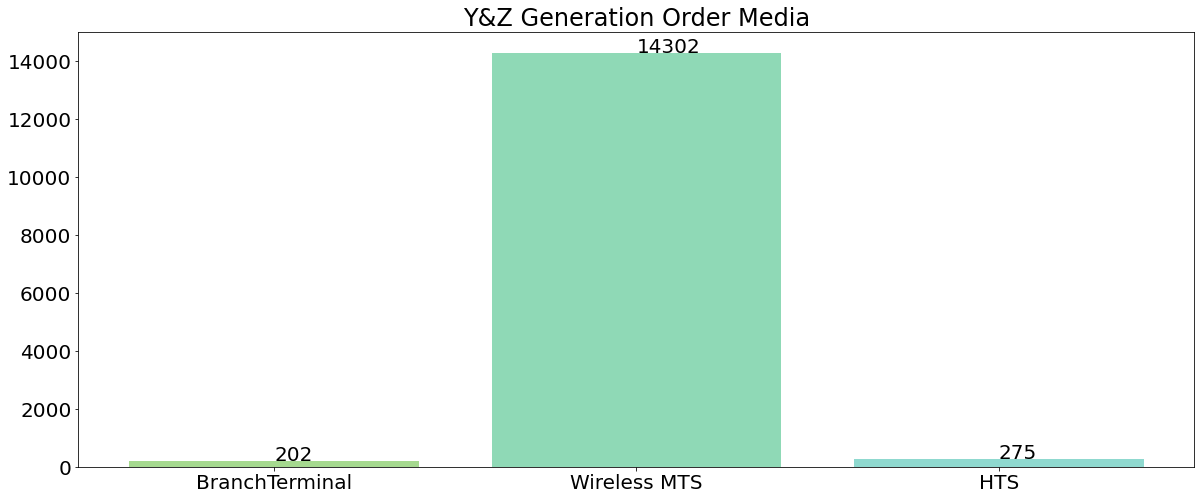

In [137]:
#-*-coding:utf-8-*-

plt.figure(figsize=(20,8))
plt.bar([ ORR_MDI[j-1] for j in idx], [YZ['주문매체구분코드'].value_counts()[i] for i in idx], color=['#a5d98f', '#8fd9b6', '#8fd9cf'])


'''x = [1,2,3,4,5]
y = [100,200,300,400,500]

import matplotlib.pyplot as plt

plt.bar(x,y)'''

for i in range(3):
  plt.text([ORR_MDI[j-1] for j in idx][i], [YZ['주문매체구분코드'].value_counts()[i] for i in idx][i], '{}'.format([YZ['주문매체구분코드'].value_counts()[i] for i in idx][i]) )
plt.title('Y&Z Generation Order Media')
plt.show()


In [138]:
YZ_men = YZ[YZ['성별']==1]
YZ_women = YZ[YZ['성별']==2]

[YZ['주문매체구분코드'].value_counts()[i] for i in idx]

[202, 14302, 275]

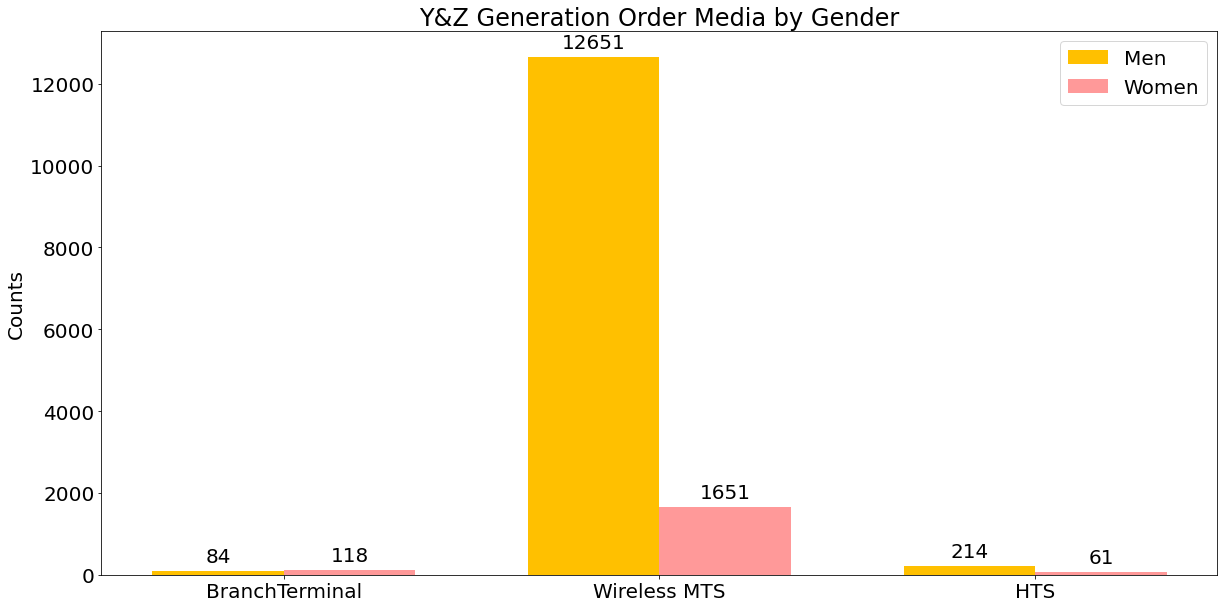

In [139]:
labels = [ ORR_MDI[j-1] for j in idx]
men_means = [YZ_men['주문매체구분코드'].value_counts()[i] for i in idx]
women_means = [YZ_women['주문매체구분코드'].value_counts()[i] for i in idx]

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(20,10))
rects1 = ax.bar(x - width/2, men_means, width, color='#ffc000', label='Men')
rects2 = ax.bar(x + width/2, women_means, width, color='#ff9999', label='Women')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Y&Z Generation Order Media by Gender')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)


#fig.tight_layout()

plt.show()

<h1><u> 주문접수시간대 </u></h>

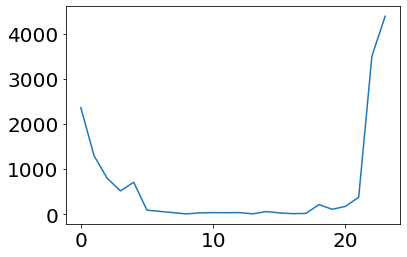

In [140]:
times = sorted(YZ['주문접수시간대'].value_counts().index)
plt.plot( times, [YZ['주문접수시간대'].value_counts()[i] for i in times])

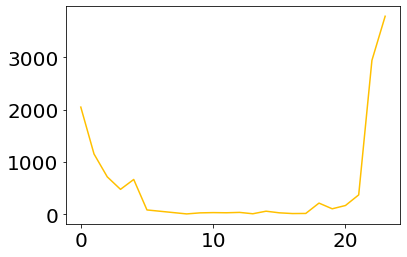

In [141]:
YZ_men = YZ[YZ['성별']==1]
times_men = sorted(YZ_men['주문접수시간대'].value_counts().index)

plt.plot( times_men, [YZ_men['주문접수시간대'].value_counts()[i] for i in times_men], color='#ffc000')

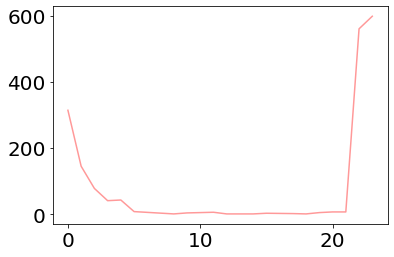

In [142]:
YZ_women = YZ[YZ['성별']==2]
times_women = sorted(YZ_women['주문접수시간대'].value_counts().index)

plt.plot( times_women, [YZ_women['주문접수시간대'].value_counts()[i] for i in times_women], color='#ff9999')

Text(0.5, 1.0, 'Order Time (Women)')

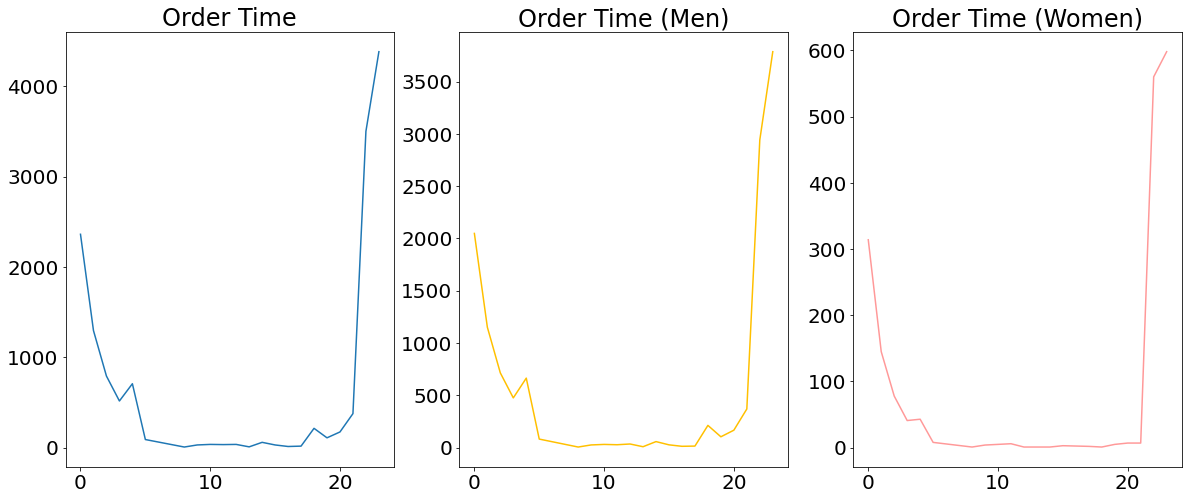

In [143]:
times = sorted(YZ['주문접수시간대'].value_counts().index)


YZ_men = YZ[YZ['성별']==1]
times_men = sorted(YZ_men['주문접수시간대'].value_counts().index)

YZ_women = YZ[YZ['성별']==2]
times_women = sorted(YZ_women['주문접수시간대'].value_counts().index)


fig, ax= plt.subplots(1,3, figsize=(20,8))


ax[0].plot( times, [YZ['주문접수시간대'].value_counts()[i] for i in times])
ax[0].set_title('Order Time')

ax[1].plot( times_men, [YZ_men['주문접수시간대'].value_counts()[i] for i in times_men], color='#ffc000')
ax[1].set_title('Order Time (Men)')

ax[2].plot( times_women, [YZ_women['주문접수시간대'].value_counts()[i] for i in times_women], color='#ff9999')
ax[2].set_title('Order Time (Women)')


Text(0.5, 1.0, 'Order Time')

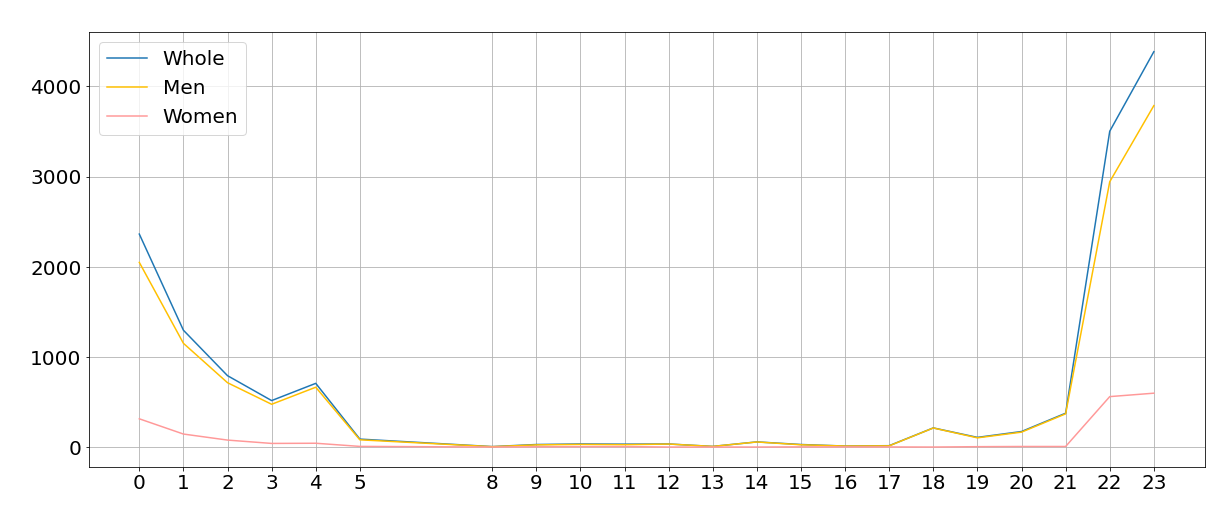

In [144]:
times = sorted(YZ['주문접수시간대'].value_counts().index)


YZ_men = YZ[YZ['성별']==1]
times_men = sorted(YZ_men['주문접수시간대'].value_counts().index)

YZ_women = YZ[YZ['성별']==2]
times_women = sorted(YZ_women['주문접수시간대'].value_counts().index)




plt.figure(figsize=(20,8))
plt.plot( times, [YZ['주문접수시간대'].value_counts()[i] for i in times])
plt.plot( times_men, [YZ_men['주문접수시간대'].value_counts()[i] for i in times_men], '#ffc000')
plt.plot( times_women, [YZ_women['주문접수시간대'].value_counts()[i] for i in times_women], '#ff9999')
plt.xlabel('Time', color='white')
plt.ylabel('Orders', color='white')
plt.xticks(times)

plt.grid(True)
plt.legend(['Whole', 'Men', 'Women'], loc='upper left')

plt.title('Order Time', color='white')

<h1><u> 계좌계설월 </u></h>
- 흥미도 구하면, 어따 쓰지? (수익에 관련시켜야 할 듯ㅁ)

In [227]:
YZ

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율,세대
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55,Y
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70,Y
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70,Y
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70,Y
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70,Y


Figure(layout=FigureLayout(height='420px'))

<module 'gmaps' from '/usr/local/lib/python3.6/dist-packages/gmaps/__init__.py'>

,latitude,longitude,magnitude
0,65.193300,-149.072500,1.70
1,38.791832,-122.780830,2.10
2,38.818001,-122.792168,0.48
3,33.601667,-116.727667,0.78
4,37.378334,-118.520836,3.64


Figure(layout=FigureLayout(height='420px'))

Figure(layout=FigureLayout(height='420px'))

<h1><u> 특정 주식에 대해서 (구매량 기준? iem 데이터 이용) </u></h>
- cus의 고객 등급 이용할 것, 성별

<h3>1)</h3> 등급별 수익 바 차트

In [197]:
#act num : 계좌 개수
#trd num : 매도 + 매수 합친 횟수
profit = pd.read_csv('/content/gdrive/Shareddrives/dacom_yz/cus_inf.csv')

profit['total_profit'] = profit['money_earn'] + profit['money_have']

In [198]:
profit

,cus_id,act_num,trd_num,money_earn,money_have,total_profit
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,1.0,1.0,-13650000.0,258300.0,-13391700.0
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,1.0,1.0,-273000.0,1450000.0,1177000.0
2,b269192b83b41bdd494d9359c2b09bee8d2590fd1a9dab...,10.0,190.0,-299474250.0,4998410.0,-294475840.0
3,4f1f253d67e417b7b6fd84ad7cbb1673b26c4ef3e46001...,11.0,3.0,-14120300.0,6491827.0,-7628473.0
4,3812991826c4fa66bf78bc62595d173d86823170d58aa1...,2.0,244.0,-94669500.0,4146000.0,-90523500.0
...,...,...,...,...,...,...
4927,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,3.0,540.0,-17789055.0,0.0,-17789055.0
4928,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,7.0,49.0,-10494575.0,0.0,-10494575.0
4929,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,4.0,153.0,-454900.0,0.0,-454900.0
4930,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,2.0,4.0,-5878958.0,0.0,-5878958.0


In [196]:
cus_eng = pd.read_csv('/content/gdrive/MyDrive/2_cus_info.csv')

yz20 = cus_eng['cus_age'] == 20
yz25 = cus_eng['cus_age'] == 25
yz30 = cus_eng['cus_age'] == 30
yz35 = cus_eng['cus_age'] == 35

cus_yz_eng = cus_eng.loc[cus_eng['cus_age'].index[yz20 | yz25 | yz30 | yz35]]

In [195]:
cus_eng = pd.read_csv('/content/gdrive/MyDrive/2_cus_info.csv')
cus_eng

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-
...,...,...,...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-


In [199]:
profit_yz = pd.merge(cus_yz_eng, profit, on = 'cus_id', how='inner')

In [200]:
profit_yz

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd,act_num,trd_num,money_earn,money_have,total_profit
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-,1.0,1.0,-13650000.0,258300.0,-13391700.0
1,a2e2aef34dadc59d14b62017832a5bd568b7062039eef2...,1,35,11,03,05,2.0,233.0,-237194260.0,33595220.0,-203599040.0
2,7d8317e7cbd1ab353c113627212bead7d03692343bf5ad...,1,35,27,09,04,3.0,186.0,-3228980.0,33206680.0,29977700.0
3,d132895a102736340c59369b3ca3019c3efb1354b12ca5...,2,35,43,03,05,3.0,30.0,-39043500.0,8297151.0,-30746349.0
4,468e183cbe273ac23da9a1b779dcf3da7c681c6909129f...,1,35,47,04,-,3.0,9.0,-60391500.0,1129160.0,-59262340.0
...,...,...,...,...,...,...,...,...,...,...,...
3413,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03,3.0,540.0,-17789055.0,0.0,-17789055.0
3414,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-,7.0,49.0,-10494575.0,0.0,-10494575.0
3415,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-,4.0,153.0,-454900.0,0.0,-454900.0
3416,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-,2.0,4.0,-5878958.0,0.0,-5878958.0


In [218]:
tmp = profit_yz['total_profit']
tmp[tmp>0]

2        29977700.0
6        43294830.0
7        24999098.0
11        4659270.0
12       59047362.0
           ...     
3403    119423230.0
3405    200727720.0
3407       123900.0
3408      4461555.0
3412         2335.0
Name: total_profit, Length: 528, dtype: float64

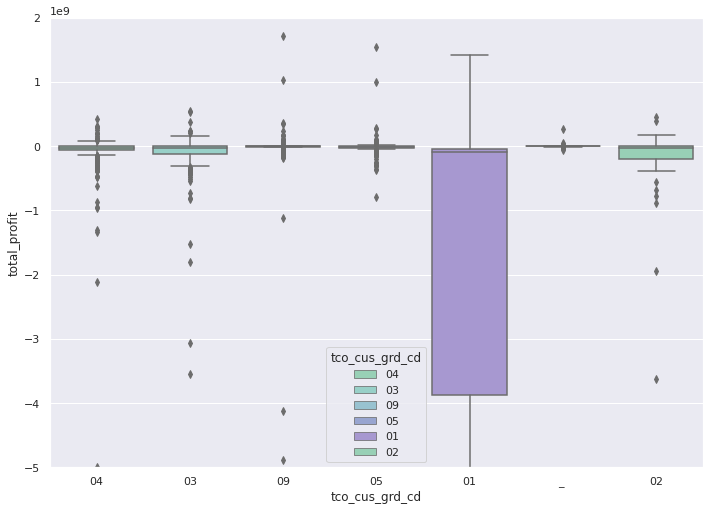

In [226]:
palette = [ '#8fd9b6', '#8fd9cf', '#8fc7d9', '#8fa0d9', '#a28fd9', '#b98fd9']

#ax = sns.barplot(x="tco_cus_grd_cd", y="total_profit", hue="tco_cus_grd_cd", data=profit_yz, palette = palette, dodge=False, edgecolor='k', capsize = 0.1)
ax = sns.boxplot(x="tco_cus_grd_cd", y="total_profit", hue="tco_cus_grd_cd", data=profit_yz, palette = palette, dodge=False)

ax.set(ylim=(-5000000000, 2000000000))
sns.set(rc={'figure.figsize':(11.7,8.27)})


등급별 인기 종목 pie chart
연령대별 인기 종목 pie chart

<h1><u> 지도 히트맵 </u></h>

In [ ]:
pip install -U plotly

     |████████████████████████████████| 13.2MB 4.1MB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [151]:
from urllib.request import urlopen
import json
with urlopen('https://raw.githubusercontent.com/plotly/datasets/master/geojson-counties-fips.json') as response:
    counties = json.load(response)

import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/fips-unemp-16.csv",
                   dtype={"fips": str})

import plotly.express as px

fig = px.choropleth(df, geojson=counties, locations='fips', color='unemp',
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           scope="usa",
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

TypeError: ignored

In [154]:
ex = {'경도' : [127.061026,127.047883,127.899220,128.980455,127.104071,127.102490,127.088387,126.809957,127.010861,126.836078
                ,127.014217,126.886859,127.031702,126.880898,127.028726,126.897710,126.910288,127.043189,127.071184,127.076812
                ,127.045022,126.982419,126.840285,127.115873,126.885320,127.078464,127.057100,127.020945,129.068324,129.059574
                ,126.927655,127.034302,129.106330,126.980242,126.945099,129.034599,127.054649,127.019556,127.053198,127.031005
                ,127.058560,127.078519,127.056141,129.034605,126.888485,129.070117,127.057746,126.929288,127.054163,129.060972],
     '위도' : [37.493922,37.505675,37.471711,35.159774,37.500249,37.515149,37.549245,37.562013,37.552153,37.538927,37.492388
              ,37.480390,37.588485,37.504067,37.608392,37.503693,37.579029,37.580073,37.552103,37.545461,37.580196,37.562274
              ,37.535419,37.527477,37.526139,37.648247,37.512939,37.517574,35.202902,35.144776,37.499229,35.150069,35.141176
              ,37.479403,37.512569,35.123196,37.546718,37.553668,37.488742,37.493653,37.498462,37.556602,37.544180,35.111532
              ,37.508058,35.085777,37.546103,37.483899,37.489299,35.143421],
     '구분' : ['음식','음식','음식','음식','생활서비스','음식','음식','음식','음식','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','소매','음식','음식','음식','음식','소매','음식','소매','음식','음식','음식','음식','음식','음식'
             ,'음식','음식','음식','음식','소매','음식','음식','의료','음식','음식','음식','소매','음식','음식','음식','음식'
             ,'음식','음식','음식']}

ex=pd.DataFrame(ex)
ex

,경도,위도,구분
0,127.061026,37.493922,음식
1,127.047883,37.505675,음식
2,127.899220,37.471711,음식
3,128.980455,35.159774,음식
4,127.104071,37.500249,생활서비스
5,127.102490,37.515149,음식
6,127.088387,37.549245,음식
7,126.809957,37.562013,음식
8,127.010861,37.552153,음식
9,126.836078,37.538927,음식


In [156]:
import folium

#지도의 중심을 지정하기 위해 위도와 경도의 평균 구하기
lat = ex['위도'].mean()
long = ex['경도'].mean()

#지도 띄우기
m = folium.Map([lat,long],zoom_start=9)
m

In [ ]:
https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json

In [159]:
cus

,고객번호,성별,연령대,주소(시도),고객등급,고객투자성향
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1,7e50c268acce884b1a5b78c9b5645b517c4639413c6dc4...,2,0,41,09,-
2,36d3cd293c4b02a00103fa1ba33ffbee176173a55df75b...,1,70,27,03,-
3,96b6dea03dc71d9ddb1462e06fdba23def1ddc838debf7...,1,70,41,09,-
4,034eb5406bd021a9a88f046e33765efd5b3cd190b39538...,1,70,11,05,-
...,...,...,...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-


미국

In [312]:

url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
state_geo = f'{url}/us-states.json'
state_unemployment = f'{url}/US_Unemployment_Oct2012.csv'
state_data = pd.read_csv(state_unemployment)

m = folium.Map(location=[48, -102], zoom_start=3)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    columns=['State', 'Unemployment'],
    key_on='feature.id',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Unemployment Rate (%)'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [315]:
state_data

,State,Unemployment
0,AL,7.1
1,AK,6.8
2,AZ,8.1
3,AR,7.2
4,CA,10.1
5,CO,7.7
6,CT,8.4
7,DE,7.1
8,FL,8.2
9,GA,8.8


In [274]:
cus_yz_eng

,cus_id,sex_dit_cd,cus_age,zip_ctp_cd,tco_cus_grd_cd,ivs_icn_cd
0,1eec7e43dd6ea34d6be7a9484459e4db1a2da44c5bf311...,2,20,29,04,-
1261,a2e2aef34dadc59d14b62017832a5bd568b7062039eef2...,1,35,11,03,05
1262,7d8317e7cbd1ab353c113627212bead7d03692343bf5ad...,1,35,27,09,04
1263,d132895a102736340c59369b3ca3019c3efb1354b12ca5...,2,35,43,03,05
1264,468e183cbe273ac23da9a1b779dcf3da7c681c6909129f...,1,35,47,04,-
...,...,...,...,...,...,...
9995,214df7b2a183c8c11b57289537897b7b456d38a222a5ef...,2,35,48,04,03
9996,4d4e0c6c802058822d61622ae2b3e39471fa2a87152035...,2,35,41,09,-
9997,347190a59df83bbf2d87888915b95cd5b5c52fb781a45e...,2,35,11,09,-
9998,3ae218361d32511eec17e92b139f048ec2613ff6d56ac9...,1,35,31,05,-


한국 (지역별 고객수)

In [ ]:

'''41: 경기 / 11: 서울 / 48: 경남 / 26: 부산 / 27: 대구

47: 경북 / 28: 인천 / 44: 충남 / 46: 전남 / 30: 대전

29: 광주 / 43: 충북 / 45: 전북 / 42: 강원 / 31: 울산


50: 제주 / 36: 세종 / -: 해당 없음'''

In [277]:
names = ['서울특별시', '경기도', '경상남도', '부산광역시','인천광역시','대구광역시', '경상북도', '충청남도', '대전광역시', '충청북도', '광주광역시', '전라북도', '전라남도', '강원도', '울산광역시', '세종특별자치시', '제주특별자치도', '?']
customers = cus_yz_eng['zip_ctp_cd'].value_counts()

In [295]:
tmp = pd.DataFrame({"name" : names, "customers" : customers})

In [318]:
tmp

,name,customers
11,서울특별시,877
41,경기도,869
48,경상남도,214
26,부산광역시,171
28,인천광역시,166
27,대구광역시,151
47,경상북도,134
44,충청남도,133
30,대전광역시,110
43,충청북도,101


In [ ]:
https://github.com/southkorea/southkorea-maps/blob/master/kostat/2013/json/skorea_provinces_geo_simple.json
"https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"

한국 최종

In [381]:
tmp1 = tmp.reset_index(drop=True)
tmp1

,name,customers
0,서울특별시,877
1,경기도,869
2,경상남도,214
3,부산광역시,171
4,인천광역시,166
5,대구광역시,151
6,경상북도,134
7,충청남도,133
8,대전광역시,110
9,충청북도,101


0       서울특별시
1         경기도
2        경상남도
3       부산광역시
4       인천광역시
5       대구광역시
6        경상북도
7        충청남도
8       대전광역시
9        충청북도
10      광주광역시
11       전라북도
12       전라남도
13        강원도
14      울산광역시
15    세종특별자치시
16    제주특별자치도
17          ?
Name: name, dtype: object

In [410]:
import json
import urllib.request

In [446]:
state_geo = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"

#url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"
#text_data = urllib.request.urlopen(url).read().decode('utf-8')
#state_geo = json.loads(text_data)

#json_data = json.loads(data)

state_data = tmp1 #tmp

m = folium.Map(location=[36.5, 128], zoom_start=7)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=state_data,
    #data=state_data,
    columns=('name', 'customers'),
    #columns=['name', 'customers'],
    key_on='feature.properties.name',
    #key_on='feature.properties.names',
    #fill_color='RdPu',
    fill_color='YlGn',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='The Number of Customers'
).add_to(m)

folium.LayerControl().add_to(m)

m

In [386]:
state_geo

{'features': [{'geometry': {'coordinates': [[[[126.95749379078595,
        33.52245641407977],
       [126.97319896844937, 33.49875407762396],
       [126.96872405188999, 33.48622329800168],
       [126.94954584505405, 33.489544759407586],
       [126.94279608185538, 33.50103054305068],
       [126.95749379078595, 33.52245641407977]]],
     [[[126.7825845509244, 33.56393550760943],
       [126.8018582544952, 33.55370235630926],
       [126.82997198813513, 33.556850838139745],
       [126.8331417008612, 33.543008206660225],
       [126.85956040109559, 33.523745962792475],
       [126.87389326757639, 33.528409852451844],
       [126.90448695242354, 33.52306487302841],
       [126.91799070614931, 33.49833730982538],
       [126.90673163147841, 33.48381434309957],
       [126.91451306459106, 33.46996423357717],
       [126.93834260745915, 33.47055272719846],
       [126.94220969441905, 33.459025579395615],
       [126.92858555273448, 33.4491472596985],
       [126.91017277433778, 33.402610

In [355]:
pip install mapboxgl

     |████████████████████████████████| 51kB 2.6MB/s 
  Created wheel for chroma-py: filename=chroma_py-0.1.0.dev1-cp36-none-any.whl size=5105 sha256=8e00e4d3ae20025fdcc75d08cbc5664f624af06bffa07930ed93deee922f1863
  Stored in directory: /root/.cache/pip/wheels/43/3b/8c/3f6d7536b8bef26b7c3be5989f8103513eb949e50a4f9f81cf
Successfully built chroma-py


다른 버전

In [398]:
import os
from mapboxgl.viz import *
from mapboxgl.utils import *
from mapboxgl.utils import create_color_stops

# 환경변수에서 자신의 mapbox token 을 가져옵니다.
#token = os.getenv('MAPBOX_ACCESS_TOKEN')

token = 'pk.eyJ1IjoianVueWVvbmdhaG4wMzE5IiwiYSI6ImNrajY0MHI2djBoOTQzM3FnaGk2dTA0emsifQ.spSQ5Bz-EdJeUlFy-IEHFQ'

# 서울시 중심부의 경도, 위도 입니다. 
center = [126.986, 37.565]

# 시각화 할 값에 따른 색상의 범주를 지정해줍니다.

color_breaks = [0, 10000, 20000, 30000, 40000, 50000]
color_stops = create_color_stops(color_breaks, colors='BuPu')

# color_stops 에는 다음과 같은 값이 들어갑니다.
# color_stops = [
#     [0, 'rgb(237,248,251)'],
#     [10000, 'rgb(191,211,230)'],
#     [20000, 'rgb(158,188,218)'],
#     [30000, 'rgb(140,150,198)'],
#     [40000, 'rgb(136,86,167)'],
#     [50000, 'rgb(129,15,124)']
# ]

# ChoroplethViz 를 그립니다.
viz = ChoroplethViz(
    access_token=token,
    data=state_geo,
    color_property=state_data['customers'],
    color_stops=color_stops,
    center=center,
    zoom=10)

# 맵을 출력합니다.
viz.show()

In [397]:
token

'pk.eyJ1IjoianVueWVvbmdhaG4wMzE5IiwiYSI6ImNrajY0MHI2djBoOTQzM3FnaGk2dTA0emsifQ.spSQ5Bz-EdJeUlFy-IEHFQ'

cheplotheviz 다른 방식

In [399]:
url = "https://raw.githubusercontent.com/southkorea/southkorea-maps/master/kostat/2013/json/skorea_provinces_geo_simple.json"
text_data = urllib.request.urlopen(url).read().decode('utf-8')
data = json.loads(text_data)


In [401]:
tmp1

,name,customers
0,서울특별시,877
1,경기도,869
2,경상남도,214
3,부산광역시,171
4,인천광역시,166
5,대구광역시,151
6,경상북도,134
7,충청남도,133
8,대전광역시,110
9,충청북도,101


In [407]:
for i in range(len(tmp1)) : 
    for j in range(len(tmp1)) : 
        if data['features'][i]['properties']["name"] == tmp1["name"][j] : 
            data['features'][i]['properties']["people"] = int(tmp1["customers"][j])

IndexError: ignored

In [406]:
data

{'features': [{'geometry': {'coordinates': [[[[126.95749379078595,
        33.52245641407977],
       [126.97319896844937, 33.49875407762396],
       [126.96872405188999, 33.48622329800168],
       [126.94954584505405, 33.489544759407586],
       [126.94279608185538, 33.50103054305068],
       [126.95749379078595, 33.52245641407977]]],
     [[[126.7825845509244, 33.56393550760943],
       [126.8018582544952, 33.55370235630926],
       [126.82997198813513, 33.556850838139745],
       [126.8331417008612, 33.543008206660225],
       [126.85956040109559, 33.523745962792475],
       [126.87389326757639, 33.528409852451844],
       [126.90448695242354, 33.52306487302841],
       [126.91799070614931, 33.49833730982538],
       [126.90673163147841, 33.48381434309957],
       [126.91451306459106, 33.46996423357717],
       [126.93834260745915, 33.47055272719846],
       [126.94220969441905, 33.459025579395615],
       [126.92858555273448, 33.4491472596985],
       [126.91017277433778, 33.402610

고객수 탑3 지역 등급 분포 piechart

In [418]:
pip install plotly --upgrade

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.14.1)


In [439]:
import plotly.offline
import plotly.express as px

In [442]:
fig = px.pie(YZ, values='성별', names='연령대', title='asd')
plotly.offline.plot(fig)

ValueError: ignored

In [430]:
(YZ

,계좌번호,고객번호,성별,연령대,주문날짜,주문순서,주문접수시간대,최종체결시간대,종목코드,매매구분코드,체결수량,체결가격,주문매체구분코드,거래통화코드,거래통화환율,세대
0,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190102,1,14,14,CNE100001526,2,100.0,49.1500,3,CNY,162.55,Y
1,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,1,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
2,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,2,11,11,CNE100001526,1,1000.0,52.7000,3,CNY,165.92,Y
3,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,3,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
4,12c2bf5b4929fa3cb8b8aa7b45c0d000f7e3b868621b5b...,a9f344e5eb3d6dc77ee4ba02e1bb2ae45a605cec70dafa...,1,30,20190214,4,11,11,CNE100001526,1,100.0,52.7000,3,CNY,165.92,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29296,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,2,23,23,US5500211090,2,3.0,308.1995,3,USD,1200.70,Y
29297,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,3,23,23,US30303M1027,2,4.0,219.3000,3,USD,1200.70,Y
29298,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,4,23,23,US6541061031,2,9.0,96.8000,3,USD,1200.70,Y
29299,d222b80b74e9d5990e136bbf0e682f34d41628139dcdfc...,6103c069e900259181efa244763c30c8df701cbe8e0e00...,1,35,20200630,5,23,23,US88160R1014,2,1.0,1046.9200,3,USD,1200.70,Y


In [437]:
pip install plotly==4.11.0

Uninstalling plotly-4.14.1:
  Would remove:
    /usr/local/etc/jupyter/nbconfig/notebook.d/plotlywidget.json
    /usr/local/lib/python3.6/dist-packages/_plotly_future_/*
    /usr/local/lib/python3.6/dist-packages/_plotly_utils/*
    /usr/local/lib/python3.6/dist-packages/plotly-4.14.1.dist-info/*
    /usr/local/lib/python3.6/dist-packages/plotly/*
    /usr/local/lib/python3.6/dist-packages/plotlywidget/*
    /usr/local/share/jupyter/nbextensions/plotlywidget/extension.js
    /usr/local/share/jupyter/nbextensions/plotlywidget/index.js
Proceed (y/n)? y
  Successfully uninstalled plotly-4.14.1


In [445]:
pip uninstall plotly

In [444]:
import plotly
print(plotly.__version__)

4.4.1


In [438]:
import chart_studio.plotly as py

In [420]:
pip install chart-studio

     |████████████████████████████████| 71kB 3.3MB/s 


NameError: ignored

지역별 이익이나
등급별 손익 파이차트